<a href="https://colab.research.google.com/github/chrishunt11/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales
Christopher Hunt

## Project Overview


### Link to original dataset from Analytics Vidhya:
- [Analytics Vidhya Link](https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/)

### Data Dictionary for this dataset:
- [Data Dictionary](https://drive.google.com/file/d/1zTSwo2__MqZsTqetwajXurSwDbwGnMd5/view?usp=drive_link)


## Load and Inspect Data

In [322]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the csv file using pandas then assigning it to df
df = pd.read_csv('/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv')

# Viewing the first 5 rows in the DataFrame
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [323]:
# Taking a look at how many rows, columns in the dataset
df.shape

(8523, 12)

In [324]:
# looking at the basic information in the dataset (rows, columns, non-null count, dtype)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [325]:
# Creating a copy of the dataframe before making any changes
df2 = df.copy()

## Clean Data

#### Checking the amount of rows and columns

In [326]:
# Checking for rows, columns
df.shape

(8523, 12)

There are 8523 rows and 12 columns

#### Data types of each variable



In [327]:
# checking the data types for each variable
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

#### Checking for duplicates

In [328]:
# Checking for any duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [329]:
# Finding the sum for duplicated values
df.duplicated().sum()

0

There are not any duplicate values in this dataset

#### Changing a Data Type

To make things easier to read and group up, we are going to be dropping the 'Tier' string from Outlet_Location_Type so that only the number will be displayed

In [330]:
# removing the 'Tier' string from 'Outlet_Location_Type'
df['Outlet_Location_Type'] = df['Outlet_Location_Type'].str.replace('Tier', '')
df['Outlet_Location_Type'].head()

0     1
1     3
2     1
3     3
4     3
Name: Outlet_Location_Type, dtype: object

In [331]:
df['Outlet_Location_Type'] = df['Outlet_Location_Type'].astype(float)
df['Outlet_Location_Type'].dtype

dtype('float64')

#### Identifying Missing Values

##### Seperating numerical and categorical columns

In [332]:
# Seperating the numeric and categorical columns
cat_cols = df.select_dtypes('object').columns
num_cols = df.select_dtypes('number').columns
print(f'Categorical columns: {cat_cols} \n\n Numeric columns: {num_cols}')

Categorical columns: Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Type'],
      dtype='object') 

 Numeric columns: Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Location_Type',
       'Item_Outlet_Sales'],
      dtype='object')


##### Addressing the missing values by using a placeholder value.

###### Categorical columns

In [333]:
# Checking the sum of the NaN values in cat_cols
df[cat_cols].isna().sum()

Item_Identifier         0
Item_Fat_Content        0
Item_Type               0
Outlet_Identifier       0
Outlet_Size          2410
Outlet_Type             0
dtype: int64

In [334]:
# Taking a look at Outlet Size values
df['Outlet_Size'].value_counts(dropna=False)

Medium    2793
NaN       2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [335]:
# Filling in 'MISSING' for the NaN values in Outlet_Size
#df['Outlet_Size'] = df['Outlet_Size'].fillna('MISSING')
#df['Outlet_Size'].value_counts(dropna=False)

###### Numerical Columns

In [336]:
# Checking the sum of the NaN values in num_cols
df[num_cols].isna().sum()

Item_Weight                  1463
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Item_Outlet_Sales               0
dtype: int64

In [337]:
# Taking a look at 'Item Weight' values
df['Item_Weight'].value_counts(dropna=False)

NaN       1463
12.150      86
17.600      82
13.650      77
11.800      76
          ... 
7.275        2
7.685        1
9.420        1
6.520        1
5.400        1
Name: Item_Weight, Length: 416, dtype: int64

In [338]:
df['Item_Weight'].unique()

array([ 9.3  ,  5.92 , 17.5  , 19.2  ,  8.93 , 10.395, 13.65 ,    nan,
       16.2  , 11.8  , 18.5  , 15.1  , 17.6  , 16.35 ,  9.   , 13.35 ,
       18.85 , 14.6  , 13.85 , 13.   ,  7.645, 11.65 ,  5.925, 19.25 ,
       18.6  , 18.7  , 17.85 , 10.   ,  8.85 ,  9.8  , 13.6  , 21.35 ,
       12.15 ,  6.42 , 19.6  , 15.85 ,  7.39 , 10.195,  9.895, 10.895,
        7.905,  9.195,  8.365,  7.97 , 17.7  , 19.35 ,  8.645, 15.6  ,
       18.25 ,  7.855,  7.825,  8.39 , 12.85 , 19.   ,  5.905,  7.76 ,
       16.75 , 15.5  ,  6.055,  6.305, 20.85 , 20.75 ,  8.895, 19.7  ,
        8.75 , 13.3  ,  8.31 , 19.75 , 17.1  , 10.5  ,  6.635, 14.15 ,
        8.89 ,  9.1  ,  7.5  , 16.85 ,  7.485, 11.6  , 12.65 , 20.25 ,
        8.6  , 12.6  ,  8.88 , 20.5  , 13.5  ,  7.235,  6.92 ,  8.02 ,
       12.8  , 16.6  , 14.   , 16.   , 21.25 ,  7.365, 18.35 ,  5.465,
        7.27 ,  6.155, 19.5  , 15.2  , 14.5  , 13.1  , 12.3  , 11.1  ,
       11.3  ,  5.75 , 11.35 ,  6.525, 10.3  ,  5.78 , 11.85 , 18.75 ,
      

In [339]:
# Finding the stats behind the Item_Weight column
df['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [340]:
# Assigning the mean of 'Item_Weight' to a variable
#item_mean = df['Item_Weight'].mean()
#item_mean

In [341]:
# Filling in the mean weight to all the missing values in the 'Item_Weight' column
#df['Item_Weight'] = df['Item_Weight'].fillna(item_mean)
#df['Item_Weight'].value_counts(dropna=False)

##### Confirming no more missing values

In [342]:
# Checking the entire DataFrame for any missing values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### Finding and fixing any inconsistencies

In [343]:
# Creating a variable for string columns
string_cols = df.select_dtypes('object').columns
string_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Type'],
      dtype='object')

In [344]:
# Using a for loop to print out the value counts of each string column
for col in string_cols:
  print(f'Value count: {col}')
  print(df[col].value_counts())
  print('\n')

Value count: Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value count: Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value count: Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value count: Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OU

In [345]:
# Taking a look at 'Item_Fat_Content' values
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [346]:
# Fixing the inconsistencies
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF' : 'Low Fat',
                                                         'reg' : 'Regular',
                                                         'low fat' : 'Low Fat'})

In [347]:
# Checking value counts for Item_Fat_Content again
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

#### Printing the stats for the numerical columns

In [348]:
# Using a for loop to print out the stats for any numerical column
for col in num_cols:
  print(f'Stats for:{col}')
  print(df[col].describe())
  print('\n')

Stats for:Item_Weight
count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64


Stats for:Item_Visibility
count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64


Stats for:Item_MRP
count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64


Stats for:Outlet_Establishment_Year
count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64


Stats for:Outlet_Location_Type
count    8523.000000
mean        2.

## Exploratory Data Analysis

### Heatmap of Data

In [349]:
# creating a correlation in the dataframe
corr = df.corr(numeric_only=True)
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Item_Outlet_Sales
Item_Weight,1.00,-0.01,0.03,-0.01,0.00,0.01
Item_Visibility,-0.01,1.00,-0.00,-0.07,-0.03,-0.13
Item_MRP,0.03,-0.00,1.00,0.01,0.00,0.57
Outlet_Establishment_Year,-0.01,-0.07,0.01,1.00,-0.09,-0.05
Outlet_Location_Type,0.00,-0.03,0.00,-0.09,1.00,0.09
Item_Outlet_Sales,0.01,-0.13,0.57,-0.05,0.09,1.00


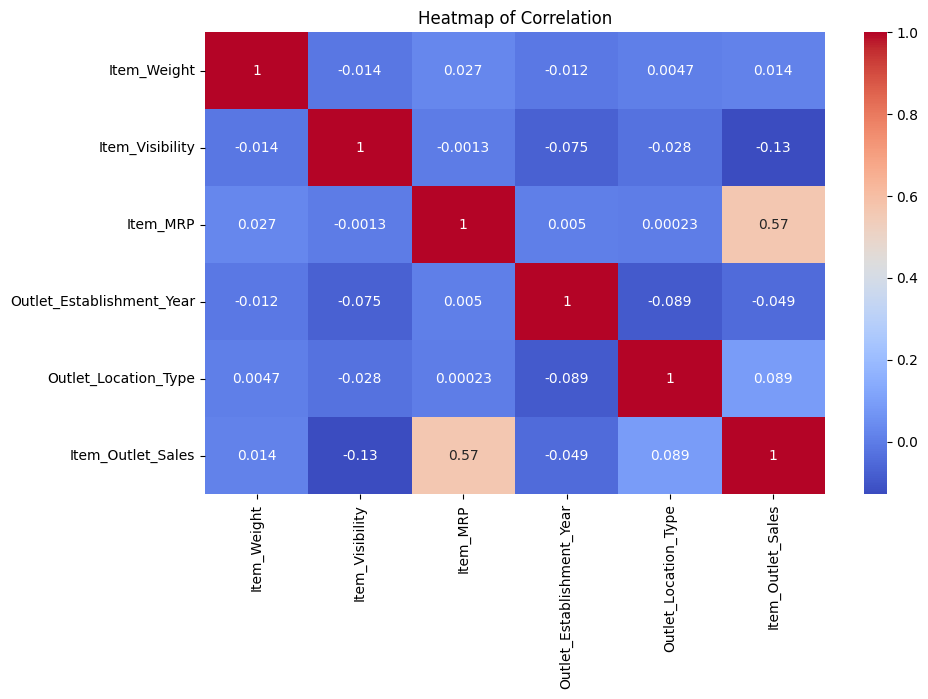

In [350]:
# changing the size of the figure
plt.figure(figsize=(10, 6))

# creating a heatmap
ax = sns.heatmap(corr, cmap='coolwarm', annot=True);
ax.set_title('Heatmap of Correlation');

- Here we can see there is a relatively strong correlation between Item MRP and Item Outlet Sales

### Histogram

##### Item Visibility

Let's take a look at a Histogram of Item Visibilty

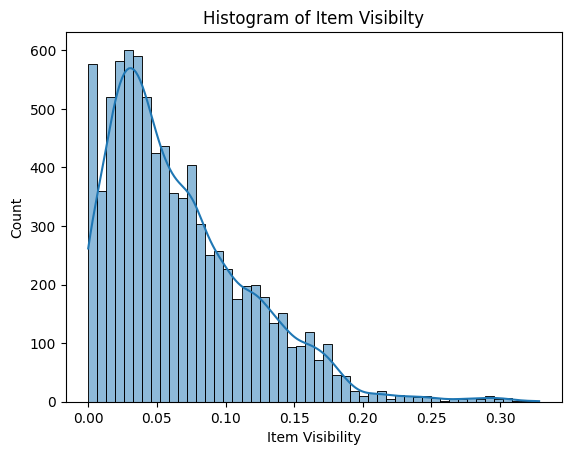

In [351]:
# Creating a histogram of Item Visibility
ax = sns.histplot(data=df, x='Item_Visibility', kde=True)

# setting the title, xlabel, and ylabel
ax.set_title('Histogram of Item Visibilty');
ax.set_xlabel('Item Visibility')
ax.set_ylabel('Count');

Majority of the products have about a .025 visibilty

##### Item Sales

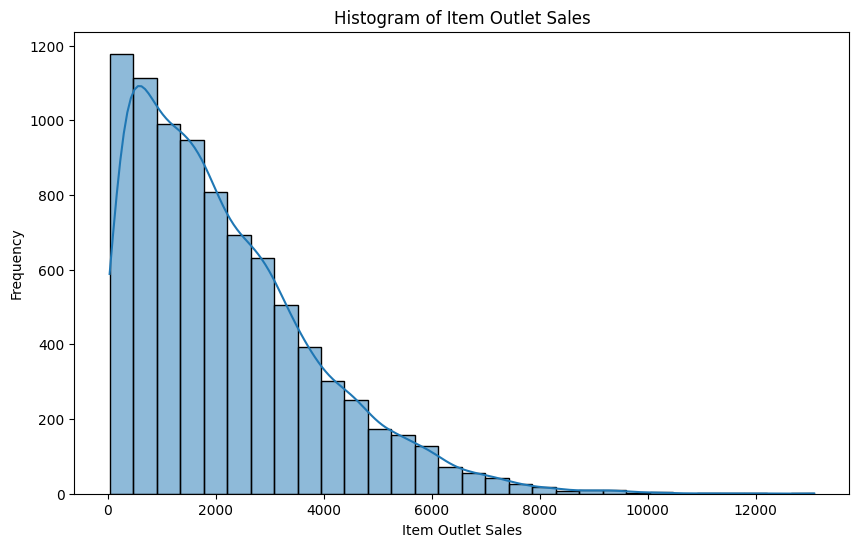

In [352]:
# changing the size of the figure
plt.figure(figsize=(10, 6))

# creating hisogram of item outlet sales
ax = sns.histplot(data=df, x='Item_Outlet_Sales', bins=30, kde=True)

# setting the x label, y label, and title
ax.set_xlabel('Item Outlet Sales')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Item Outlet Sales');

Most of the Item Sales were under $1000

##### MRP

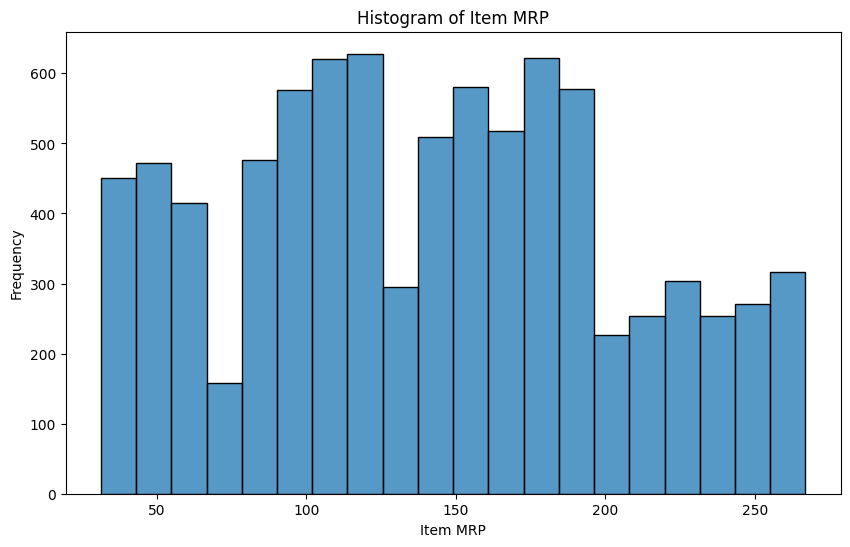

In [353]:
# changing the size of the figure
plt.figure(figsize=(10, 6))

# Histogram of Item MRP
ax = sns.histplot(df['Item_MRP'], bins=20, edgecolor='black')

# setting the xlabel, ylabel, and title
ax.set_xlabel('Item MRP')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Item MRP');

As you can see from the histogram above, the majority MRP is around $100

### Countplot

##### Outlet Types

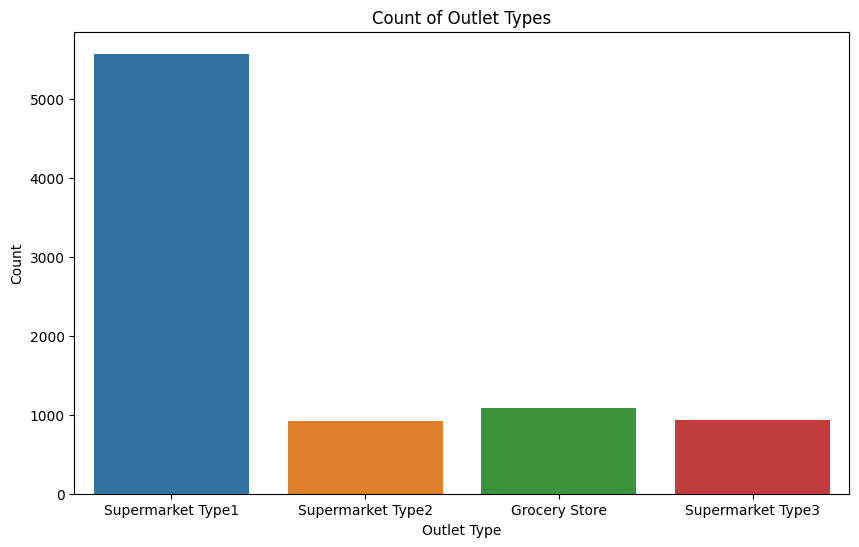

In [354]:
# changing the size of the figure
plt.figure(figsize=(10, 6))

# creating a countplot of outlet type
ax = sns.countplot(data=df, x='Outlet_Type')

# creating the xlabel, ylabel, and title
ax.set_xlabel('Outlet Type')
ax.set_ylabel('Count')
ax.set_title('Count of Outlet Types');

As you can see from the countplot above, there are more than 4 times the amount of Supermarket Type 1's than any other Outlet Types

##### Outlet Types by Location

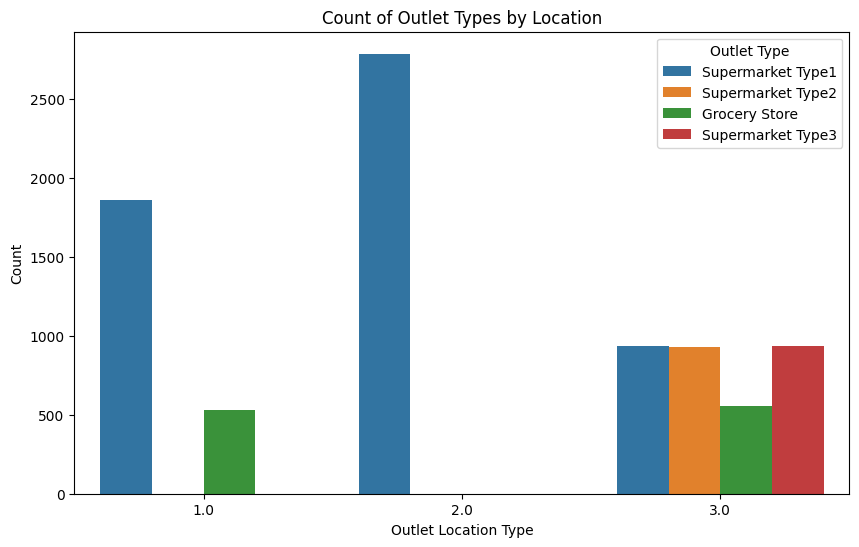

In [355]:
# changing the size of the figure
plt.figure(figsize=(10, 6))

# creating a countplot of outlet location type and outlet type
ax = sns.countplot(data=df, x='Outlet_Location_Type', hue='Outlet_Type')

# changing the xlabel, ylabel, title, and setting a legend
ax.set_xlabel('Outlet Location Type')
ax.set_ylabel('Count')
ax.set_title('Count of Outlet Types by Location')
plt.legend(title='Outlet Type');

From the countplot from above we can see that in Tier 3 locations there is at least one kind of outlet type. In Tier's 1 and 2, Supermarket Type 1 have the most stores with them being the only store in Tier 2.

### Boxplot

##### Outlet Size vs Outlet Sales

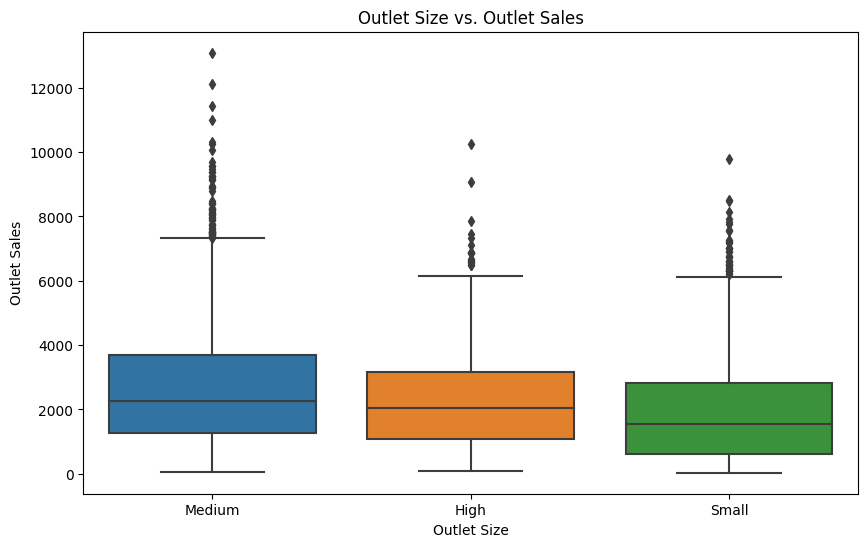

In [356]:
# changing the size of the figure
plt.figure(figsize=(10, 6))

# creating a boxplot of the outlet size vs outlet sales
ax = sns.boxplot(data=df, x='Outlet_Size', y='Item_Outlet_Sales')

# creating xlabel, ylabel, and title
ax.set_xlabel('Outlet Size')
ax.set_ylabel('Outlet Sales')
ax.set_title('Outlet Size vs. Outlet Sales');

As we can see from the boxplot above, the median sales are higher in the sales location that are larger. In the Medium sized Outlets, there seem to br a lot of outliers. There is a lot of missing information in this dataset which could skew the information per Outlet Size.

##### Outlet Type vs Outlet Sales

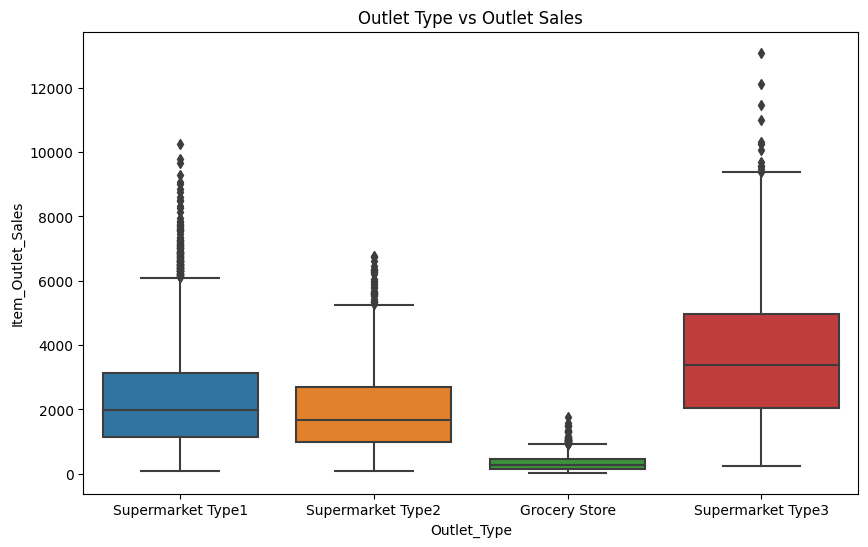

In [357]:
# changing the size of the figure
plt.figure(figsize=(10,6))

# creating a boxplot of the outlet sales vs outlet type
ax = sns.boxplot(data=df, y='Item_Outlet_Sales', x='Outlet_Type')
ax.set_xlabel('Outlet_Type')
ax.set_ylabel('Item_Outlet_Sales');
ax.set_title('Outlet Type vs Outlet Sales');

As you can see clearly from the outlet type, Supermarket Type 3 has the largest amount of Item Sales. Grocery Store does not have many sales compared to the other types of Outlets.

### Barplots

##### Average Sales per Outlet Type

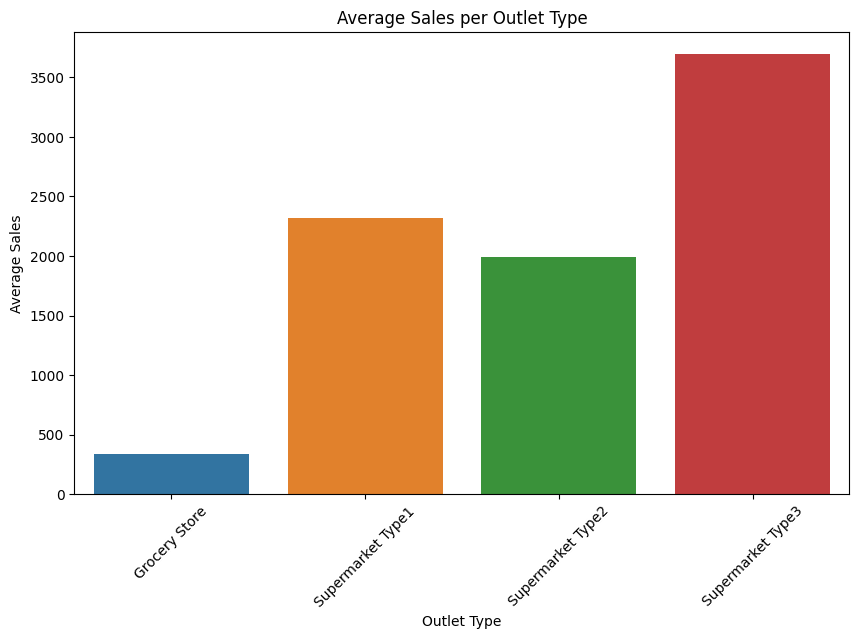

In [358]:
# using groupby to to find the average sales per outlet
average_sales_per_outlet = df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().reset_index()

# changning the figure size
plt.figure(figsize=(10, 6))

# creating a barplot
ax = sns.barplot(data=average_sales_per_outlet, x='Outlet_Type', y='Item_Outlet_Sales')

# setting the xlabels, ylabels, title, and rotating the xlabels 45 degrees
ax.set_xlabel('Outlet Type')
ax.set_ylabel('Average Sales')
ax.set_title('Average Sales per Outlet Type')
plt.xticks(rotation=45);

We can see from this graph that the Supermarket Type 3 have the most sales.

##### Average Sale per Item Type

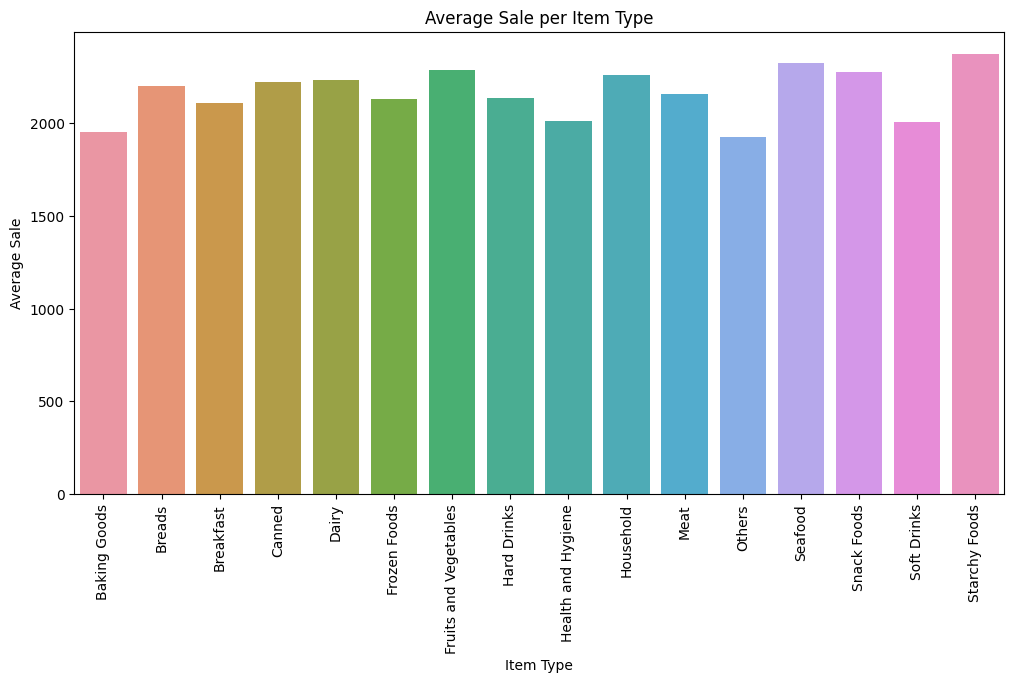

In [359]:
# using groupby to find the average sale per item type
average_sale_per_item = df.groupby('Item_Type')['Item_Outlet_Sales'].mean().reset_index()

# changing the size of the figure
plt.figure(figsize=(12, 6))

# creating a barplot
ax = sns.barplot(data=average_sale_per_item, x='Item_Type', y='Item_Outlet_Sales')

# changing the xlabel, ylabel, title, and rotating the xlabels 90 degrees
ax.set_xlabel('Item Type')
ax.set_ylabel('Average Sale')
ax.set_title('Average Sale per Item Type')
plt.xticks(rotation=90)
plt.show()


This graph shows the Sales per Items. As we can see Starchy Foods sells the most, followed by Seafood, and Fruits and Vegetables.

##### Sales on Low fat vs Regular

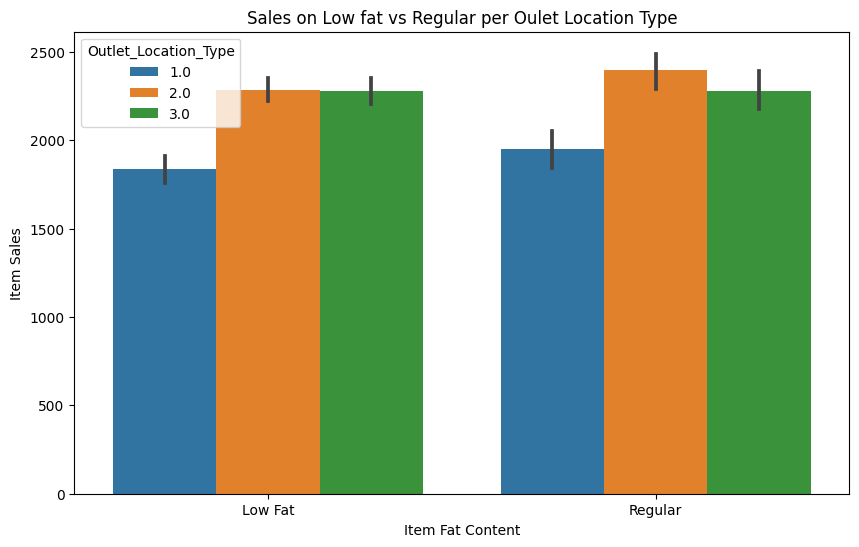

In [360]:
# changing the size of the figure
plt.figure(figsize=(10, 6))

# creating a barplot
ax = sns.barplot(data=df, x='Item_Fat_Content', y='Item_Outlet_Sales', hue='Outlet_Location_Type')

# changing the xlabel, ylabel, and title
ax.set_xlabel('Item Fat Content')
ax.set_ylabel('Item Sales')
ax.set_title('Sales on Low fat vs Regular per Oulet Location Type');

As we can see from above the Sales per Fat Content does not vary much along with the Outlet Location Type.

##### Sales on Outlet Size

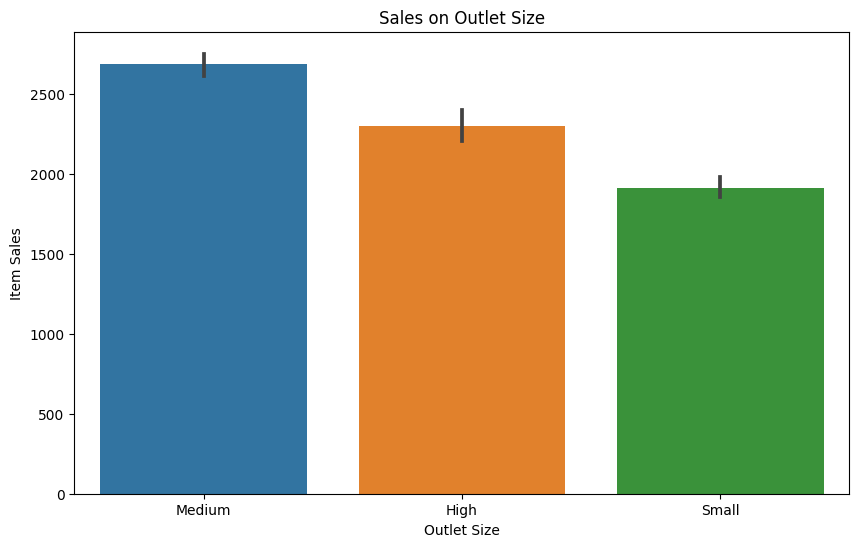

In [361]:
# changing the size of the figure
plt.figure(figsize=(10, 6))

# creating a barplot
ax = sns.barplot(data=df, x='Outlet_Size', y='Item_Outlet_Sales')

# changing the xlabel, ylabel, and title
ax.set_xlabel('Outlet Size')
ax.set_ylabel('Item Sales')
ax.set_title('Sales on Outlet Size');

As we can see from the graph above, Medium sized stores have the most Item Sales with High Outlet sized stores following right behind it.

## Explanatory Data Analysis

### Univariate

In [362]:
import seaborn as sns
import matplotlib.pyplot as plt

# exploring categorical
def explore_categorical(df, x, fillna=True, placeholder='MISSING',
                        figsize=(6,4), order=None):

  # making a copy of the dataframe and na
  temp_df = df.copy()

  # before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_percent = null_count/len(temp_df) * 100

  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # create a figure with desired size
  fig, ax = plt.subplots(figsize=figsize)

  # plotting the countplot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)

  # rotating tick labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # adding a title with the feature name included
  ax.set_title(f'Column: {x}', fontweight='bold')

  # fixing layout and showing plot
  fig.tight_layout()
  plt.show()

  # printing null value info
  print(f"- NaN's found: {null_count} ({null_percent:.2f}%)")

  # print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # fing value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)

  # define most common value
  most_common_val = val_counts.index[0]

  # define the frequency of the most common value
  freq = val_counts.values[0]

  # calculate the percentage of the most common value
  percent_most_common = freq / len(temp_df) * 100

  # print the results
  print(f"- Most common Value: '{most_common_val}' occurs {freq} times ({percent_most_common:.2f}%)")

  # print message if quasi-constant or constan (greater than 98% of data)
  if percent_most_common > 98:
    print("\n - [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print('- Not constant or quasi-constant')

  # returning fig, ax
  return fig, ax

# exploring numeric
def explore_numeric(df, x, figsize=(6,5)):

  # making our figure with gridspec for suubplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)

  # histogram on top
  sns.histplot(data=df, x=x, ax=axes[0])

  # boxplot on bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  # adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  # adjusting subplots to best fill figure
  fig.tight_layout()

  # ensure plot is shown before message
  plt.show()

  # print message with info on the count and % of null values
  null_count = df[x].isna().sum()
  null_percent = null_count / len(df) * 100
  print(f"- NaN's found: {null_count} ({null_percent:.2f}%)")

### Multivariate

In [363]:
import seaborn as sns
import matplotlib.pyplot as plt


# plotting categorical vs target
def plot_categorical_vs_target(df, x, y='SalePrice', figsize=(6,4),
                               fillna=True, placeholder='MISSING',
                               order=None):

# make a temp copy of the dataframe and fillna
  temp_df = df.copy()

# fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
# or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])

# create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

# barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
            linewidth=1, edgecolor='black', errorbar=None)

# boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
              order=order, hue_order=order, legend=False,
              edgecolor='white', linewidth=0.5, size=3,
              zorder=0)

# rotating the x labels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# adding a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax

# plotting numeric vs target
def plot_numeric_vs_target(df, x, y='SalePrice', figsize=(6,4)):

  # calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white', 'lw':1, 'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  # adding the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # make sure the plot is shown before the print statement
  plt.show()
  return fig, ax

### Filtering out Columns to use

In [364]:
# filtering out columns
select_cols = ['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
               'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
               'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales']
df = df[select_cols]
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,1.0,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,3.0,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,1.0,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,3.0,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,3.0,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,3.0,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,NaN,2.0,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,2.0,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,3.0,Supermarket Type2,1845.5976


### Item_Weight

Item Weight: Weight of Product

In [365]:
# Checking the data type of Item_Weight to select the correct function
feature = 'Item_Weight'
df[feature].dtype

dtype('float64')

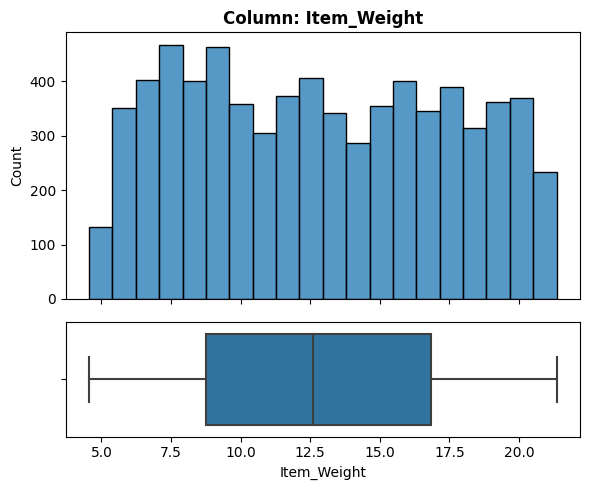

- NaN's found: 1463 (17.17%)


In [366]:
# running the appropriate function
explore_numeric(df, feature)

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 1463 null values, 17.17%.
  - Impute the median

3. Is the feature constant or quasi-constant?
  - No

4. What is the cardinality? Is it high?
  - Not applicable (numeric)
5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No



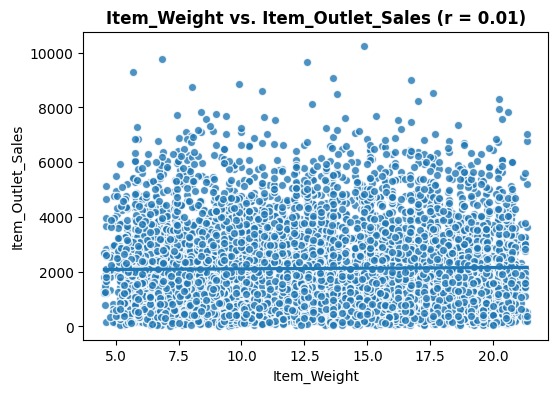

In [367]:
# running the appropriate feature vs target
plot_numeric_vs_target(df, feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - No
  - Does this feature appear to be a predictor of the target?
    - No

___

### Item_Fat_Content


Item Fat Content: Whether the product is low-fat or regular

In [368]:
# setting the feature and checking the dtype
feature = 'Item_Fat_Content'
df[feature].dtype

dtype('O')

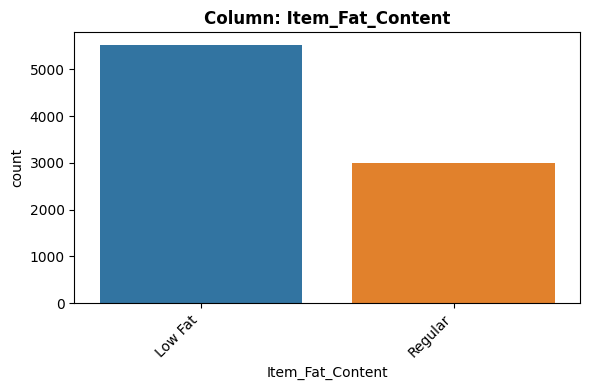

- NaN's found: 0 (0.00%)
- Unique Values: 2
- Most common Value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant


In [369]:
# using the appropriate function
explore_categorical(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values, 0%

3. Is the feature constant or quasi-constant?
  - No

4. What is the cardinality? Is it high?
  - Low. Only 2 unique values

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No



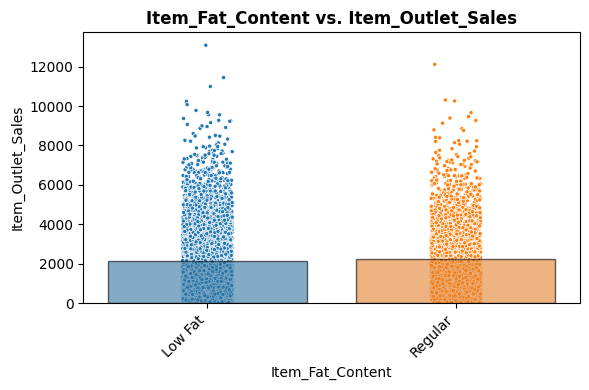

In [370]:
# running appropriate feature vs target
plot_categorical_vs_target(df, feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I think people would buy more Low fat than Regular.
  - Does this feature appear to be a predictor of the target?
    - Not really, both have about the same sales

___

### Item_Visibility

Item Visibility: The percentage of total display area of all products in a store allocated to the particular product

In [371]:
# checking the data type
feature = 'Item_Visibility'
df[feature].dtype

dtype('float64')

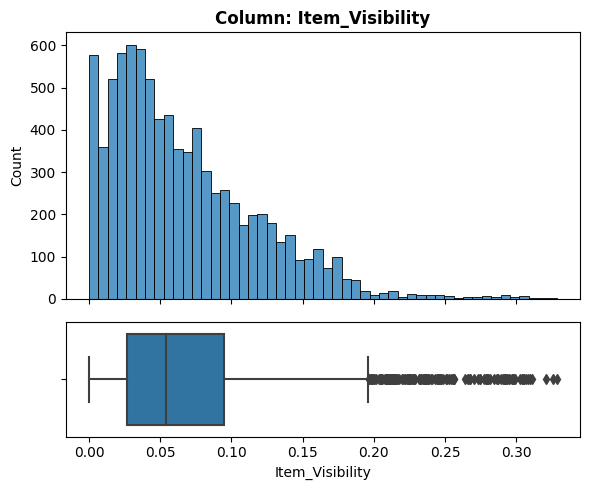

- NaN's found: 0 (0.00%)


In [372]:
# applying the exploring numeric function
explore_numeric(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values. 0%

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable, numeric.

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No



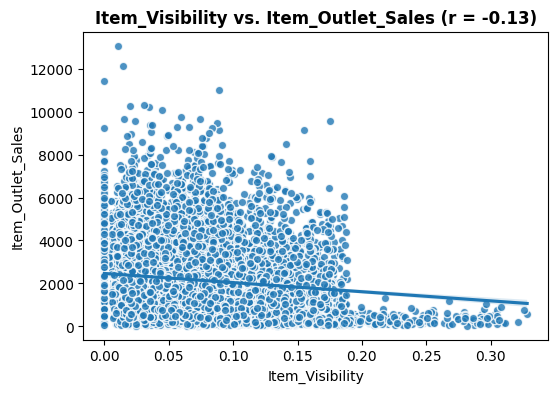

In [373]:
plot_numeric_vs_target(df, feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I think the more visible an item is the more sales it'll have
  - Does this feature appear to be a predictor of the target?
    - Yes, but opposite of what I expected.

___

### Item_Type

Item Type: The category to which the product belongs

In [374]:
# finding the dtype of Item_type
feature = 'Item_Type'
df[feature].dtype

dtype('O')

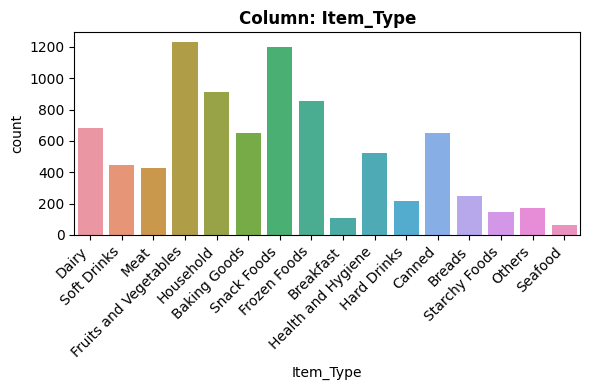

- NaN's found: 0 (0.00%)
- Unique Values: 16
- Most common Value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant


In [375]:
# apply to categorical function
explore_categorical(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0%)

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Cardinality is high. 16 unique values

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No



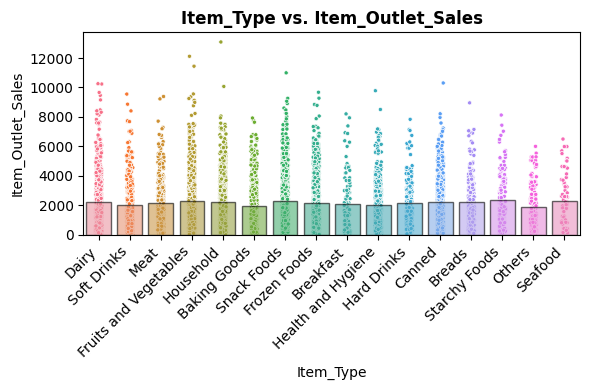

In [376]:
# running appropriate feature vs target
plot_categorical_vs_target(df, feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I think Snack foods would be bought the most.
  - Does this feature appear to be a predictor of the target?
    - No.

___

### Item_MRP

Item MRP: Maximum Retail Price (list price) of the product

In [377]:
# finding the dtype
feature = 'Item_MRP'
df[feature].dtype

dtype('float64')

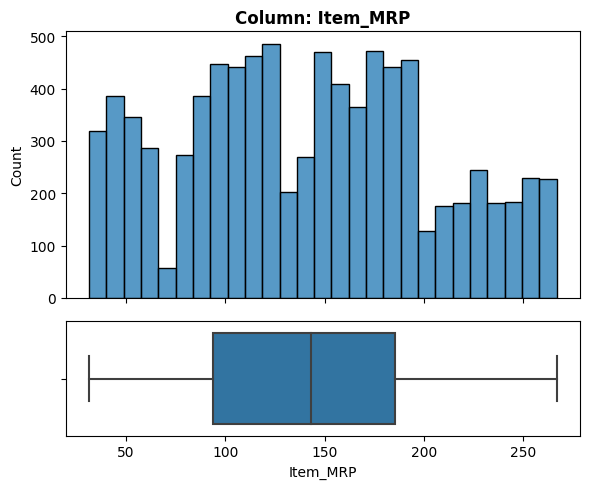

- NaN's found: 0 (0.00%)


In [378]:
# applying to the numeric
explore_numeric(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0%)

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable, numeric.

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No



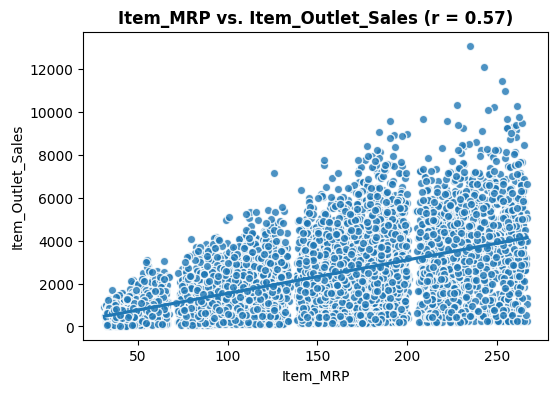

In [379]:
# compare to the target
plot_numeric_vs_target(df, feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I think the higher the Item MRP, the more sales.
  - Does this feature appear to be a predictor of the target?
    - Yes.

___

### Outlet_Establishment_Year


Outlet Establishment Year: The year in which the store was established

In [380]:
# finding the dtype
feature = 'Outlet_Establishment_Year'
df[feature].dtype

dtype('int64')

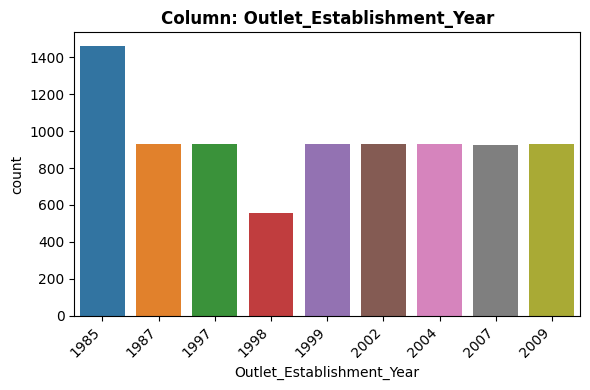

- NaN's found: 0 (0.00%)
- Unique Values: 9
- Most common Value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant


In [381]:
# applying it to the
explore_categorical(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0%)

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - No it's not high, there are 9 unique values

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No



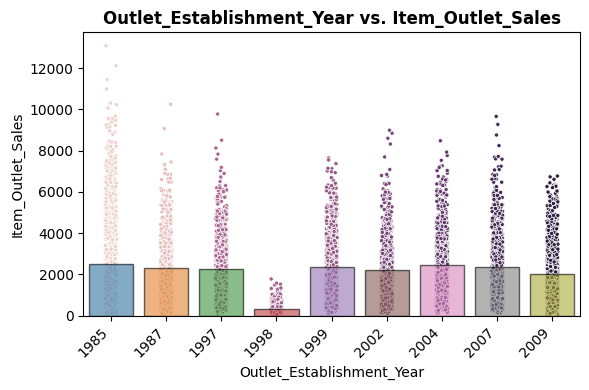

In [382]:
# plotting on the categorical
plot_categorical_vs_target(df, feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I think the older the store, the more sales it would have.
  - Does this feature appear to be a predictor of the target?
    - Yes.

___

### Outlet_Size

Outlet Size: The size of the store in terms of ground area covered

In [383]:
# checking the data type
feature = 'Outlet_Size'
df[feature].dtype

dtype('O')

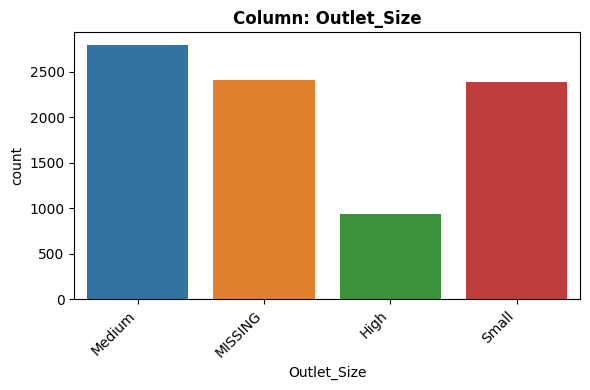

- NaN's found: 2410 (28.28%)
- Unique Values: 4
- Most common Value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant


In [384]:
# running the categorical exploration
explore_categorical(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 2410 null values (28.28%), Impute with MISSING

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - No it's not high, there are 4 unique values

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No



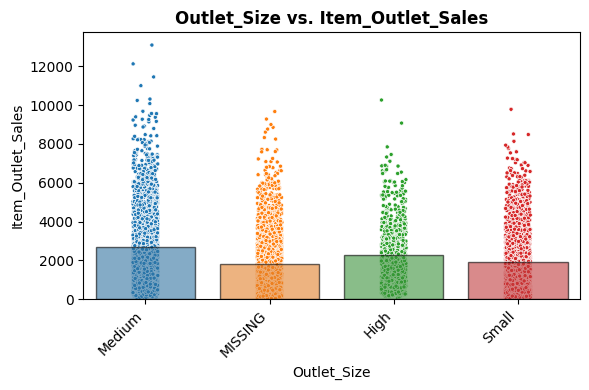

In [385]:
# plotting the categorical to the target
plot_categorical_vs_target(df, feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I think the bigger the size of the store, the more sales it would have.
  - Does this feature appear to be a predictor of the target?
    - Yes, but not how I would expect. The medium size stores have the most sales.

___

### Outlet_Location_Type


Outlet Location Type: The type of area in which the store is located

In [386]:
# checking the datatype
feature = 'Outlet_Location_Type'
df[feature].dtype

dtype('float64')

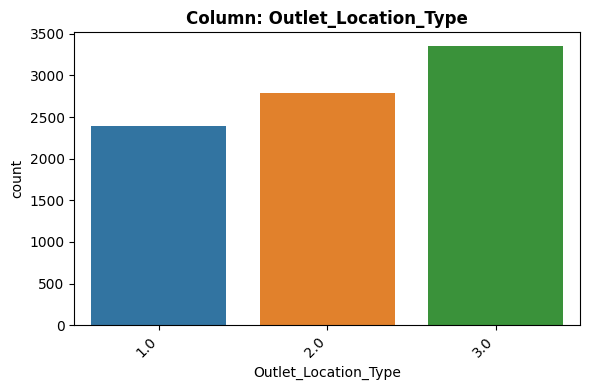

- NaN's found: 0 (0.00%)
- Unique Values: 3
- Most common Value: '3.0' occurs 3350 times (39.31%)
- Not constant or quasi-constant


In [387]:
# exploring the categorical because it is ordinal
explore_categorical(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Ordinal

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0%)

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - No it's not high, there are 3 unique values

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No



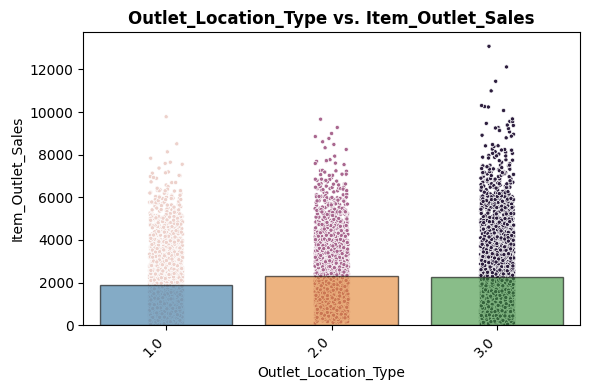

In [388]:
# plotting the categorical to the target
plot_categorical_vs_target(df, feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I think the higher the location type, the more sales it would have.
  - Does this feature appear to be a predictor of the target?
    - Yes, the higher the location type, the more sales it has

___

### Outlet_Type

Outlet Type: Whether the outlet is a grocery store or some sort of supermarket

In [389]:
# finding the dtype for outlet_type
feature = 'Outlet_Type'
df[feature].dtype

dtype('O')

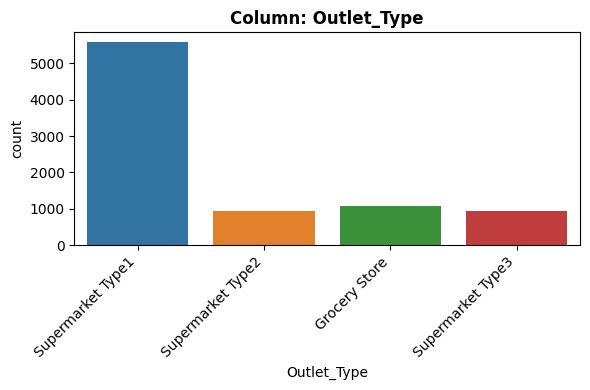

- NaN's found: 0 (0.00%)
- Unique Values: 4
- Most common Value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant


In [390]:
# using categorical exploration
explore_categorical(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0%)

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - No it's not high, there are 4 unique values

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No



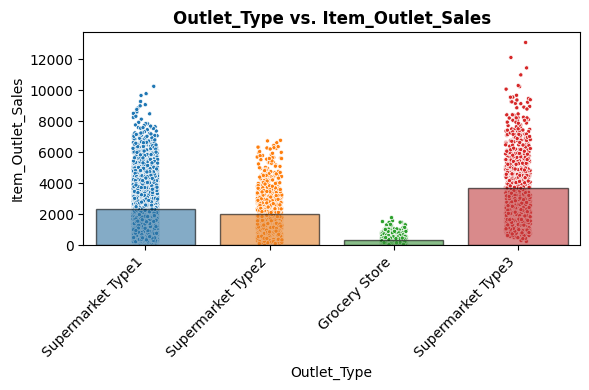

In [391]:
# plotting the categorical to the target
plot_categorical_vs_target(df, feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I think the greater the supermarket type, the more sales it'll have.
  - Does this feature appear to be a predictor of the target?
    - Yes, Grocery store has the least sales and Supermarket Type 3 have the most sales

___

### Item_Outlet_Sales

Item Outlet Sales: Sales of the product in a particular store

In [392]:
# checking the data type
feature = 'Item_Outlet_Sales'
df[feature].dtype

dtype('float64')

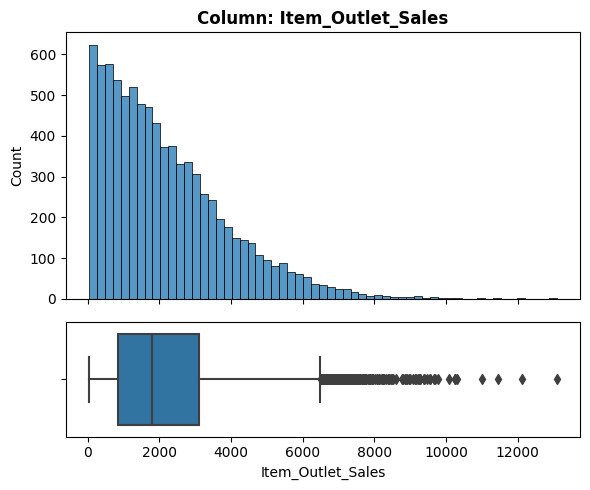

- NaN's found: 0 (0.00%)


In [393]:
# running the explore numeric
explore_numeric(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric. our target!

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0

3. Is the feature constant or quasi-constant?
  - Not a feature!

4. What is the cardinality? Is it high?
  - N/A - numeric.

5. Would we know this BEFORE the target is determined?
  - Yes, since it IS our target!

6. Is there a business case/understanding reason to exclude based on our business case?
  - Yes, its our target!



# Part 5

## Importing Libraries and Data

### Importing the libraries

In [394]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 100)
import missingno
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
# set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')

### Importing the data

In [395]:
fname = '/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week05/Data/sales_predictions_2023.csv'
df = pd.read_csv(fname)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Instructions

- Before splitting your data, you can drop duplicates and fix inconsistencies in categorical data.* (*There is a way to do this after the split, but for this project, you may perform this step before the split)

- Identify the features (X) and target (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.

- Perform a train test split

- Create a preprocessing object to prepare the dataset for Machine Learning

- Make sure your imputation of missing values occurs after the train test split using SimpleImputer.

## Cleaning the data

### Dropping Duplicates

In [396]:
df.duplicated().sum()

0

### Fixing any inconsistencies

In [397]:
cat_cols = df.select_dtypes('object')
for col in cat_cols:
  print(f'Column Name: {col}')
  print(df[col].unique())
  print('\n')

Column Name: Item_Identifier
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']


Column Name: Item_Fat_Content
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


Column Name: Item_Type
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


Column Name: Outlet_Identifier
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']


Column Name: Outlet_Size
['Medium' nan 'High' 'Small']


Column Name: Outlet_Location_Type
['Tier 1' 'Tier 3' 'Tier 2']


Column Name: Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']




There is an inconsistency in the Item Fat Content

In [398]:
# Taking a look at Item Fat Content
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [403]:
# creating a dictionary of names to fix the inconsistencies
name = {'low fat': 'Low Fat',
        'LF': 'Low Fat',
        'reg':'Regular'}

# applying the dictionary to the Item_Fat_Content column
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(name)

In [400]:
# checking the value counts to see if we fixed the inconsistencies
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

## Identify the features and target

In [401]:
# identifying the target and features
target = 'Item_Outlet_Sales'

X = df.drop(columns=[target, 'Item_Outlet_Sales'])

y = df[target]

## Performing the train test split

In [402]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Creating Preprocessing object to prepare dataset

In [405]:
# saving a list of column name
num_cols = X_train.select_dtypes('number').columns
print('Numeric Columns:', num_cols)

# instantiate preprocessors
impute_median = SimpleImputer(strategy='median')
scaler = StandardScaler()

# make numeric preprocessing pipeline
num_pipe = make_pipeline(impute_median, scaler)
num_pipe

Numeric Columns: Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

### Defining Numeric Tuple for Column Transformer

In [406]:
# defining numeric tuple
num_tuple = ('numeric', num_pipe, num_cols)
num_tuple

('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                 ('standardscaler', StandardScaler())]),
 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
        'Outlet_Establishment_Year'],
       dtype='object'))

## Creating an Ordinal Preprocessor

In [408]:
# preprocessing for Ordinal data
# saving the list of column names
ord_cols = ['Outlet_Location_Type']
print('Ordinal Columns:', ord_cols)

# create imputer for ordinal data
impute_na_ord = SimpleImputer(strategy='constant', fill_value='NA')

### Making the OrdinalEncoder
# specifying the order of the of the categories for Ordinal Location Type
tier_order = ['Tier 1', 'Tier 2', 'Tier 3']

# making the list of order lists for OrdinalEncoder
ordinal_category_order = [tier_order]
ord_encoder = OrdinalEncoder(categories=ordinal_category_order)

# making a final scaler to scale category's
scaler_ord = StandardScaler()

# making an ord pipeline
ord_pipe = make_pipeline(impute_na_ord, ord_encoder, scaler_ord)
ord_pipe

Ordinal Columns: ['Outlet_Location_Type']


Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='NA', strategy='constant')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['Tier 1', 'Tier 2', 'Tier 3']])),
                ('standardscaler', StandardScaler())])

### Defining an Ordinal Tuple for Column Transformer

In [409]:
# making an Ordinal tuple for ColumnTransformer
ord_tuple = ('ordinal', ord_pipe, ord_cols)
ord_tuple

('ordinal',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='NA', strategy='constant')),
                 ('ordinalencoder',
                  OrdinalEncoder(categories=[['Tier 1', 'Tier 2', 'Tier 3']])),
                 ('standardscaler', StandardScaler())]),
 ['Outlet_Location_Type'])

### Creating a Categorical Preprocessor

In [410]:
# preprocessing pipeline for one hot encoded data
ohe_cols = X_train.select_dtypes('object').drop(columns=ord_cols).columns
print('OneHotEncoder Columns:', ohe_cols)

# instantiate the individual preprocessors
impute_na = SimpleImputer(strategy='constant', fill_value='NA')
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# make pipeline with impute and encoder
ohe_pipe = make_pipeline(impute_na, ohe_encoder)
ohe_pipe

OneHotEncoder Columns: Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Type'],
      dtype='object')


Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='NA', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

## Defining Categorical Tuple

In [412]:
# making ohe_tuple
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)
ohe_tuple

('categorical',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='NA', strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
        'Outlet_Size', 'Outlet_Type'],
       dtype='object'))

## Create one column transformer object

In [413]:
col_transformer = ColumnTransformer([num_tuple, ord_tuple, ohe_tuple],
                                    verbose_feature_names_out=False)

col_transformer

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('ordinale...
                                 ['Outlet_Location_Type']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Type'],
      dtype='object'))],
                  verbose_feature_names_out=False)

## Fit the Column transformer object to the training data

In [414]:
# fit on training data
col_transformer.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('ordinale...
                                 ['Outlet_Location_Type']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Type'],
      dtype='object'))],
                  verbose_feature_names_out=False)

## Saving the Transformed training data

In [415]:
X_train_processed = col_transformer.transform(X_train)

In [416]:
# display first 5 rows
X_train_processed.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,Item_Identifier_DRC13,Item_Identifier_DRC25,Item_Identifier_DRC27,Item_Identifier_DRC36,Item_Identifier_DRC49,Item_Identifier_DRD01,Item_Identifier_DRD12,Item_Identifier_DRD13,Item_Identifier_DRD15,Item_Identifier_DRD24,Item_Identifier_DRD25,Item_Identifier_DRD27,Item_Identifier_DRD37,Item_Identifier_DRD49,Item_Identifier_DRD60,Item_Identifier_DRE01,Item_Identifier_DRE03,Item_Identifier_DRE12,Item_Identifier_DRE13,Item_Identifier_DRE15,Item_Identifier_DRE25,Item_Identifier_DRE27,Item_Identifier_DRE37,Item_Identifier_DRE48,Item_Identifier_DRE49,Item_Identifier_DRE60,Item_Identifier_DRF01,Item_Identifier_DRF03,Item_Identifier_DRF13,Item_Identifier_DRF15,Item_Identifier_DRF23,Item_Identifier_DRF25,Item_Identifier_DRF27,Item_Identifier_DRF36,Item_Identifier_DRF37,...,Item_Identifier_NCY41,Item_Identifier_NCY42,Item_Identifier_NCY53,Item_Identifier_NCY54,Item_Identifier_NCZ05,Item_Identifier_NCZ06,Item_Identifier_NCZ17,Item_Identifier_NCZ18,Item_Identifier_NCZ29,Item_Identifier_NCZ30,Item_Identifier_NCZ41,Item_Identifier_NCZ42,Item_Identifier_NCZ53,Item_Identifier_NCZ54,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_NA,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,0.827485,-0.712775,1.828109,1.327849,1.084948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7510,0.566644,-1.291052,0.603369,1.327849,1.084948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5828,-0.121028,1.813319,0.244541,0.136187,-1.384777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5327,-1.158464,-1.004931,-0.952591,0.732018,-0.149914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4810,1.538870,-0.965484,-0.336460,0.493686,-0.1

## Saving the Transformed Test data

In [417]:
# saving the transformed testing data
X_test_processed = col_transformer.transform(X_test)

In [420]:
# viewing first 5 rows
X_test_processed.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,Item_Identifier_DRC13,Item_Identifier_DRC25,Item_Identifier_DRC27,Item_Identifier_DRC36,Item_Identifier_DRC49,Item_Identifier_DRD01,Item_Identifier_DRD12,Item_Identifier_DRD13,Item_Identifier_DRD15,Item_Identifier_DRD24,Item_Identifier_DRD25,Item_Identifier_DRD27,Item_Identifier_DRD37,Item_Identifier_DRD49,Item_Identifier_DRD60,Item_Identifier_DRE01,Item_Identifier_DRE03,Item_Identifier_DRE12,Item_Identifier_DRE13,Item_Identifier_DRE15,Item_Identifier_DRE25,Item_Identifier_DRE27,Item_Identifier_DRE37,Item_Identifier_DRE48,Item_Identifier_DRE49,Item_Identifier_DRE60,Item_Identifier_DRF01,Item_Identifier_DRF03,Item_Identifier_DRF13,Item_Identifier_DRF15,Item_Identifier_DRF23,Item_Identifier_DRF25,Item_Identifier_DRF27,Item_Identifier_DRF36,Item_Identifier_DRF37,...,Item_Identifier_NCY41,Item_Identifier_NCY42,Item_Identifier_NCY53,Item_Identifier_NCY54,Item_Identifier_NCZ05,Item_Identifier_NCZ06,Item_Identifier_NCZ17,Item_Identifier_NCZ18,Item_Identifier_NCZ29,Item_Identifier_NCZ30,Item_Identifier_NCZ41,Item_Identifier_NCZ42,Item_Identifier_NCZ53,Item_Identifier_NCZ54,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_NA,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
7503,0.341372,-0.776646,-0.998816,-1.293807,1.084948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2957,-1.169135,0.100317,-1.585194,-0.102145,-1.384777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7031,0.388798,-0.482994,-1.595784,0.136187,-1.384777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1084,-0.049889,-0.415440,0.506592,-1.532139,1.084948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
856,-0.632039,-1.047426,0.886725,0.732018,

In [ ]:
|